In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Least Squares Implemented

### Function for adjust data like an cosine pure 


<ul>
<font size = 6>
\begin{equation} A \cos (\omega x + \phi) \end{equation}
</font>
</ul>

(25.638625278740392,
 -1.1034612682536515,
 11.043342567715348,
 1.1034612682536515)

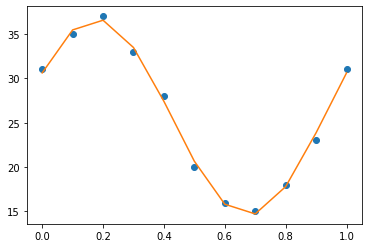

In [11]:
class least_square(object):
    
    """
    Function which adjust a set of data with least squares method. 
    Like a pure cosine in data: amplitude*cos(omega*x + phase)
        
    Parameters
    ----------
        x : array
            Values of variable independent 
            
        y : array 
            Values of variable dependendent
            
        period: Number (integer or float)
            Period for compute angular frequency od oscillation. Default: 1
    Atributes:
    ---------
        get_values: Array
        Return values adjust the input data
        
        results: Number 
        Return mean, phase, amplitude
        
    Examples:
    ----------
        y =  np.array([31,35,37,33,28,20,16,15,18,23,31])
        x =  np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

        fitting = least_square(x, y)
        fitting.results()
        
        >>> (25.638625278740392, -1.1034612682536515, 11.043342567715348)
        fitting.get_values()
        
        >>> array([30.61374721, 35.45866844, 36.55266696, 33.4778725 , 27.40875206,
       20.66350334, 15.81858211, 14.7245836 , 17.79937805, 23.8684985 ,
       30.61374721])    
    """
    
    
    def __init__(self, x, y, period = 1):
        
        #declare variable dependent and independent
        self.x = x
        self.y = y
        
        #compute de frequency angular for period 
        omega = 2*np.pi / period
        
        #Configure the array max(rows_x) X (3): vertical stack and transpose
        matrix_sol = np.vstack([np.ones(len(self.x)), np.cos(omega*self.x), 
                                np.sin(omega*self.x)]).T
        
        #solve the linear system Ax = B
        self.mean, a, b = np.linalg.lstsq(matrix_sol, self.y, rcond=None)[0]
    
        #Compute de amplitude 
        self.amplitude = np.sqrt(a**2 + b**2)
        
        # Conditions for phase 
        if a > 0:
            phase = np.arctan(- b / a) 
        elif a < 0 and b > 0:
            phase = - (np.arctan(- b / a) - np.pi)
            
        elif a < 0 and b < 0:
            phase =  (np.arctan(- b / a) + np.pi)
            
        elif a == 0 and b > 0:
            phase = np.pi / 2
            
        elif a == 0 and b < 0:
            phase = - np.pi / 2
            
        else:
            "When the amplitude is very smaller, the phase not is well defined"
            #Debug the value error for a == 0 and b == 0
            raise ValueError("Phase it is arbitrary")
            
        #change variable
        self.phase = phase
        self.omega = omega
        self.phase2 = np.arctan2(b, a)

    def get_values(self):
        "The values for adjust"
        return self.mean + self.amplitude*np.cos(self.omega*x + self.phase)
    
    def results(self):
        "The mean, phase and amplitude"
        return self.mean, self.phase, self.amplitude, self.phase2


y =  np.array([31.0, 35.0, 37.0, 33.0, 28.0, 20.0, 16.0, 15.0, 18.0, 23.0, 31.0])
x =  np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

fit = least_square(x, y)
#mean, phase, amp = fit.results()

plt.plot(x, y, 'o')
plt.plot(x, fit.get_values())
fit.results()

Wall time: 0 ns


array([-11.00958863,  -4.25116661])

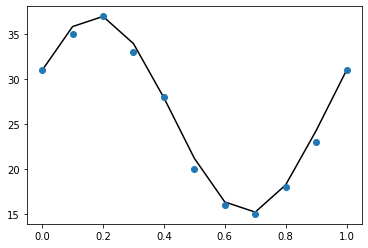

In [40]:
%time

period = 1

def func(x, a, c): 
    omega = 2*np.pi / period
    return np.mean(y) + a * np.cos(omega*x + c) 
    
popt, pcov = curve_fit(func, x, y, absolute_sigma = True)

plt.plot(x, func(x, *popt), color = 'black')
plt.plot(x, y, 'o')
popt

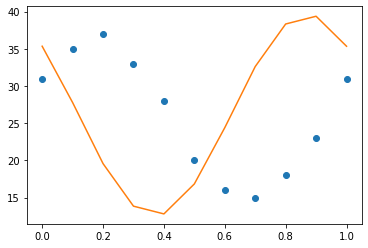

In [26]:
class least_squares_cramer(object):
    
    def __init__(self, x, y, period = 1):
        
        self.x = x
        self.y = y
        
        omega = 2*np.pi / period

        sumA = sum((np.cos(omega*self.x))**2)
        sumB = sum((-np.cos(omega*self.x))*np.sin(omega*self.x))
        sumC = sum(self.y*np.cos(omega*self.x))
        sumD = sum(np.cos(omega*self.x)*np.sin(omega*self.x))
        sumE = sum(-(np.sin(omega*self.x))**2)
        sumF = sum(self.y*np.sin(omega*self.x))

        a = ((sumC*sumE) - (sumF*sumB)) / ((sumA*sumE) - (sumB*sumD))
        b = ((sumA*sumF) - (sumD*sumC)) / ((sumA*sumE) - (sumB*sumD))

        self.values = np.mean(self.y) + a*np.cos(omega*self.x) - b*np.sin(omega*self.x)
        
        if a > 0:
            phase = np.arctan(- b / a) 
        elif a < 0 and b > 0:
            phase = - (np.arctan(- b / a) - np.pi)
        elif a < 0 and b < 0:
            phase =  (np.arctan(- b / a) + np.pi)
        elif a == 0 and b > 0:
            phase = np.pi / 2
        elif a == 0 and b < 0:
            phase = - np.pi / 2
        else:
            raise ValueError("Phase it is arbritary")
            
            
        self.phase = phase
        self.amplitude = np.sqrt(a**2 + b**2)
        self.omega = omega
    
    def get_values(self):
        return self.x, self.values
    
    def results(self):
        return np.mean(self.y), self.amplitude, self.phase 
    
    def get_adjust(self):
        return np.mean(self.y) + self.amplitude * np.cos(self.omega*self.x + self.phase)
    
y =  np.array([31,35,37,33,28,20,16,15,18,23,31])

x =  np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

fit = least_squares_cramer(x, y)
fit.results()

plt.plot(x, y, 'o')
plt.plot(x, fit.get_adjust())

In [70]:
class cosseno(object):

    def __init__(self, x, y, period):
        
        self.x = x
        self.y = y
    
        def func(x, a, c):        #Amplitude and Phase 
            omega = 2*np.pi / period
            return np.mean(self.y) + a * np.cos(omega*x + c) 
    
        self.popt, self.pcov = curve_fit(func, self.x, self.y, absolute_sigma = True)
        
        self.perr = np.sqrt(np.diag(self.pcov))
        
        self.fit  = func(self.x, *self.popt)
        nstd = 5
        
        popt_up = self.popt + nstd * self.perr
        popt_dw = self.popt - nstd * self.perr
        
        self.fit_up = func(self.x, *popt_up)
        self.fit_dw = func(self.x, *popt_dw)
        

    def get_values(self):
        return self.x, self.fit
                    
    def parameters(self):
        return self.popt, self.perr #Amplitude and Phase / Error
    
    def residual(self):
        self.residual = self.y - self.fit
        return self.x, self.residual
  
    def devition(self): # to draw 5-sigma intervals
        return self.fit, self.fit_up, self.fit_dw

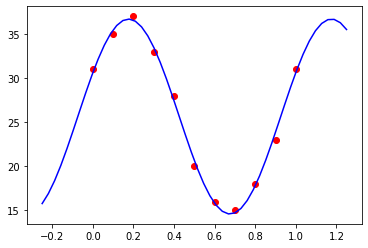

In [32]:
xi =  np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
yi =  np.array([31,35,37,33,28,20,16,15,18,23,31])

V = np.array([np.ones(len(xi)),np.cos(2*np.pi*xi), np.sin(2*np.pi*xi)]).transpose()

a = ((np.linalg.inv((V.transpose()).dot(V))).dot(V.transpose())).dot(yi)

xx = np.linspace(-0.25,1.25)

plt.plot(xi,yi,'ro')
plt.plot(xx, a[0] + a[1]*np.cos(2*np.pi*xx) + a[2]*np.sin(2*np.pi*xx), 'b-')

plt.show()

xi = np.array([0,0.25,0.5,0.75,1])
yi = np.array([-153,64,242,284,175])

V = np.array([xi**2,xi**1,xi**0]).transpose()
a = ((np.linalg.inv((V.transpose()).dot(V))).dot(V.transpose())).dot(yi)
xx = np.linspace(-0.25,1.25)
plt.plot(xi,yi,'ro',xx,np.polyval(a,xx),'b-')